# Questão
Em um Jupyter Notebook (link do collab ou arquivo), utilize o método K vizinhos mais próximos no problema supervisionado escolhido na Questão 2 OU 3 e:

1. Aplique e explique os processos de pré-processamento necessários para execução do método K-NN.
2. Escolha 5 valores de K e mostre os resultados (escolha uma métrica)?
3. Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas) para definir o(s) vizinho(s) mais próximos?

### Base usada (Questão 3) :

https://www.kaggle.com/priyanka841/breast-cancer-wisconsin?select=breast+cancer.csv

### Código

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



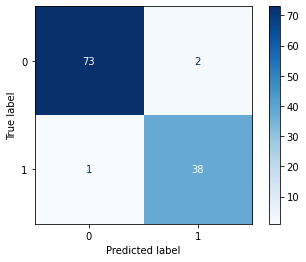

In [23]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

with open('sample_data/breast_cancer.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, quotechar='|')
    
    X = []
    y = []
    
    a = []
    
    for row in spamreader: # lendo informações do arquivo e adicionando num array
        a.append(row)
    
    a = a[1:]
    
    for row in a: 
        X.append(row[2:]) # retirando as 2 primeiras colunas que não serão utilizadas

        if (row[1] == 'B'): # fazendo o one hot encoding
            y.append(0)
        else:
            y.append(1)

        
    X = np.array(X, dtype = np.float64) # transformando itens do array de string para float

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        
    knn = neighbors.KNeighborsClassifier(n_neighbors = 7, algorithm = "auto", metric = "manhattan")
    knn.fit(X_train, y_train)
    resultKNN = knn.predict(X_test)

    print(classification_report(y_test, resultKNN))
    
    plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()


### Respostas

1. Primeiro foi retirado as 2 primeiras colunas da tabela para a criação do conjunto de testes, pois a primeira é a de `IDs` de cada amostra e não será usada no treinamento, a segunda coluna foi retirada, pois é o resultado de cada amostra (será usado para a criação do conjunto de saída). Segundamente foi utilizado o método de **one-hot-enconde** para formatação do conjunto de saída (M foi substituído para 0 e B para 1). Por fim, os valores do conjunto de treinamento foram transformados de `string` para float, pois na leitura os números vinheram do tipo `string`.

2. e 3. Valores de K e a métrica foram substituídos no código a cima:

- Métrica usada nesta tabela foi a **euclidean**, com 5 valores de **K** diferentes
  

| K | Acurácia |
| - | :------: |
| 1 |   0.91   |
| 3 |   0.89   |
| 5 |   0.96   |
| 7 |   0.89   |
| 9 |   0.89   |

 - Métrica usada nesta tabela foi a **manhattan**, com 5 valores de **K** diferentes

| K | Acurácia |
| - | :------: |
| 1 |   0.92   |
| 3 |   0.89   |
| 5 |   0.93   |
| 7 |   0.97   |
| 9 |   0.93   |
